# Análisis de la Jornada 2 del torneo de fútbol Guard1anes 2021
Contamos con un grupo de personas que se encargan de hacer pronósticos de la liga de fútbol, la idea es comparar estas predicciones contra lo que realmente pasa y poder comprobar que tan buen porcentaje de acierto hay

In [1]:
# Importamos librerías necesarias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pandas.api.types import is_numeric_dtype

In [2]:
# Cargamos archivo
df = pd.read_excel('jornada_procesada.xlsx')

# Convertimos las columnas a lowercase
df.columns = df.columns.str.lower()

# Imprimimos el nombre de las columnas
columns = df.columns
#print(f'Columnas: {columns}')

# Imprimimos cuantos registros tenemos
print(f'Contamos con un total de {len(df.index)} registros.')

Contamos con un total de 66 registros.


In [3]:
df

,unnamed: 0,necaxa,san luis,juarez,tijuana,chivas,toluca,cruz azul,puebla,rayados,america,pumas,mazatlan,santos,tigres,queretaro,atlas,leon,pachuca
0,1,1,0,0,0,1,0,2,0,1,2,2,1,1,1,0,0,2,1
1,2,1,0,1,1,2,1,1,0,2,2,2,1,1,1,0,0,1,0
2,3,2,0,1,1,1,2,2,2,1,2,2,0,1,1,3,1,2,0
3,4,2,1,1,1,2,1,2,1,2,2,2,0,2,1,2,1,2,1
4,5,2,1,1,1,2,1,2,0,2,1,1,0,1,3,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,1,1,1,0,0,2,1,1,1,1,2,1,1,1,1,0,2,2
62,63,1,1,2,1,2,1,2,1,2,1,2,1,1,2,2,1,2,1
63,64,1,2,2,1,1,2,1,1,2,1,2,0,1,2,1,1,2,1
64,65,0,0,0,2,2,0,2,1,1,1,2,1,0,1,1,1,2,0


# Analisis por partido

**********************
* necaxa vs san luis *
**********************


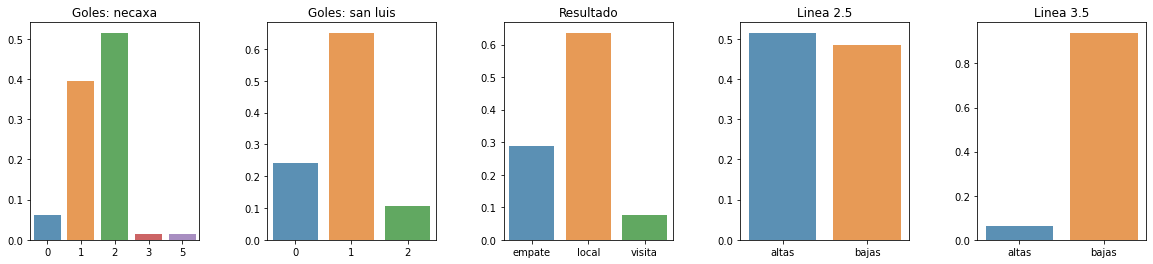

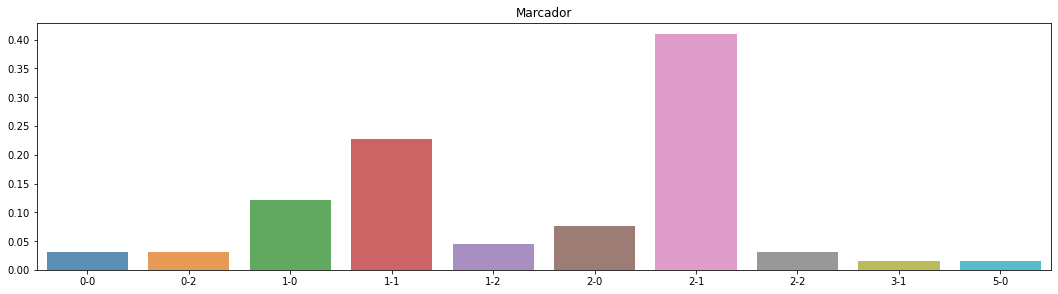

*********************
* juarez vs tijuana *
*********************


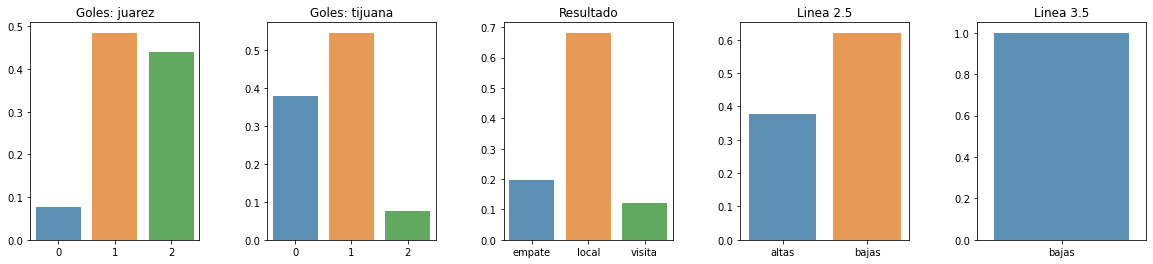

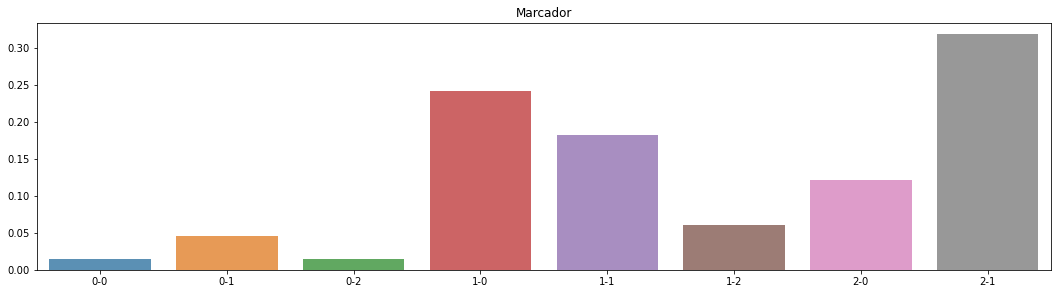

********************
* chivas vs toluca *
********************


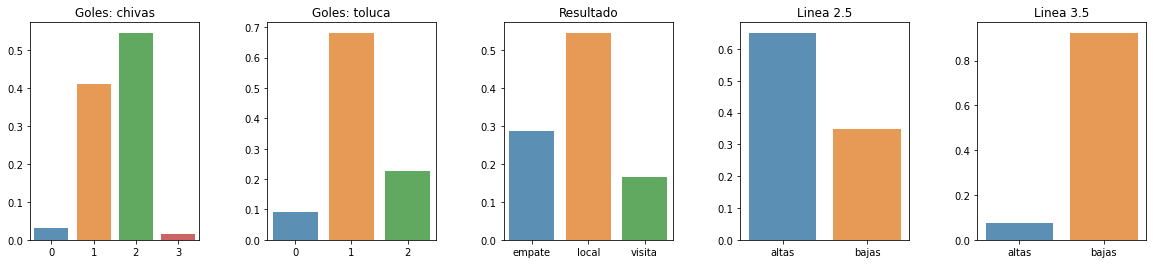

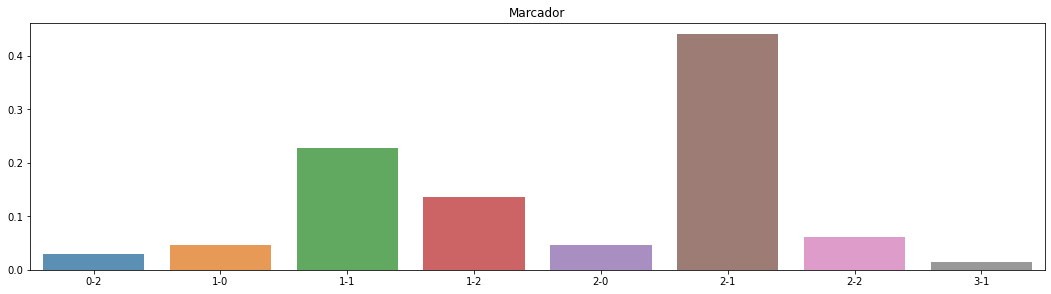

***********************
* cruz azul vs puebla *
***********************


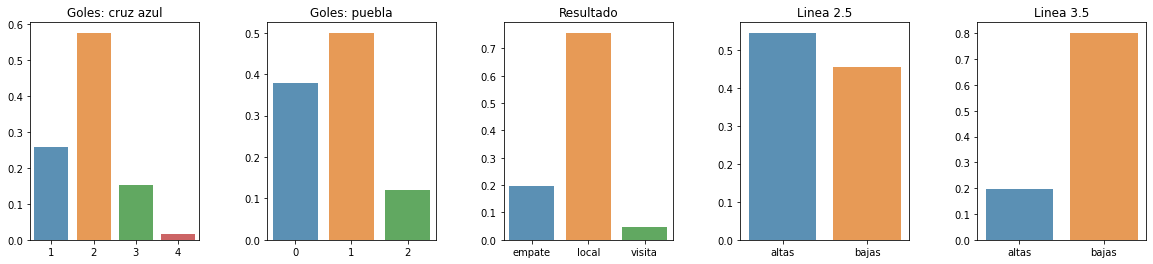

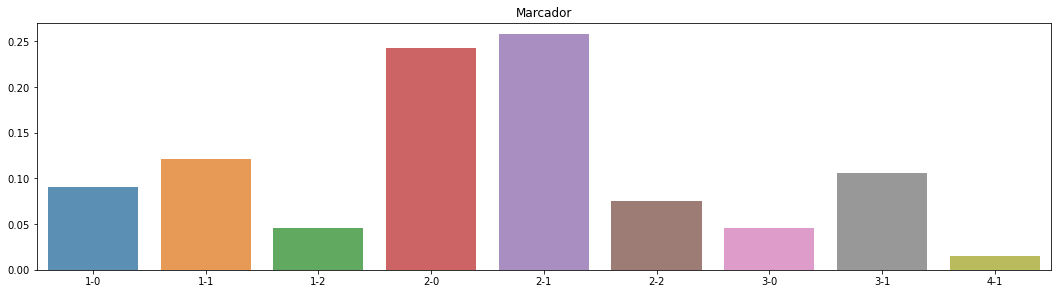

**********************
* rayados vs america *
**********************


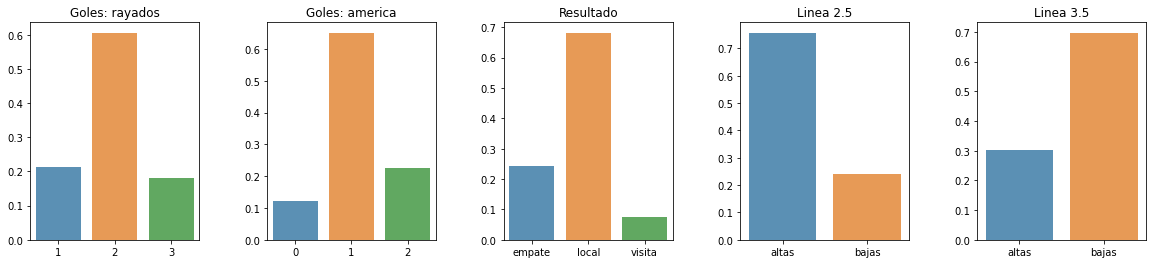

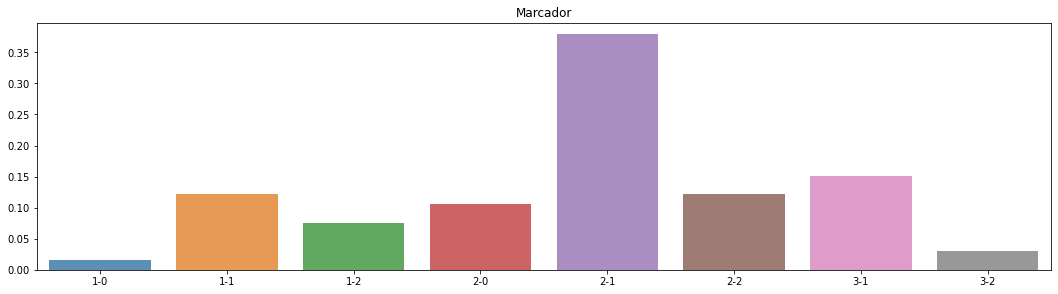

*********************
* pumas vs mazatlan *
*********************


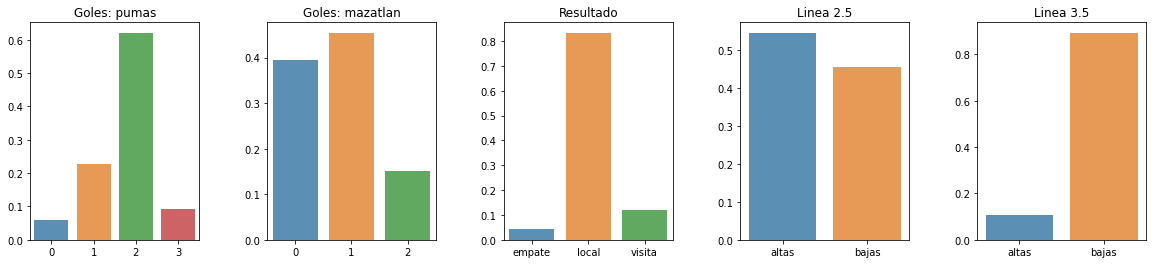

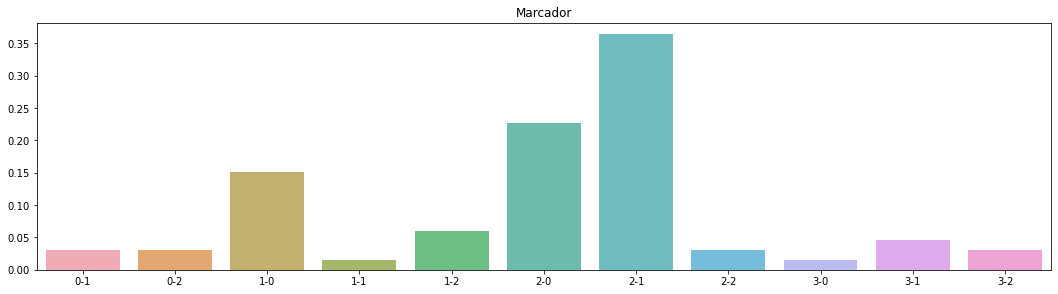

********************
* santos vs tigres *
********************


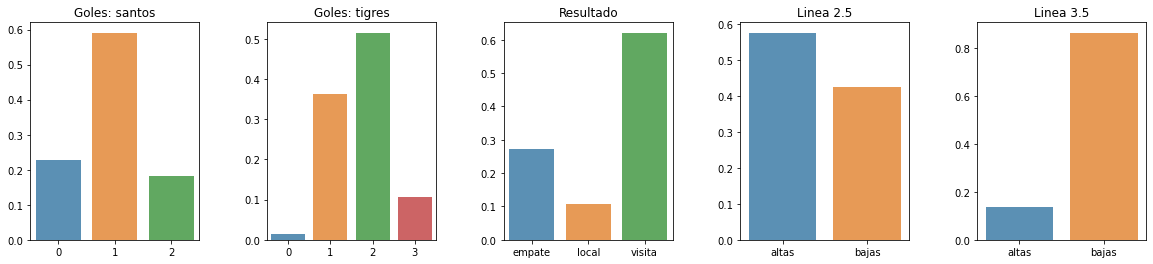

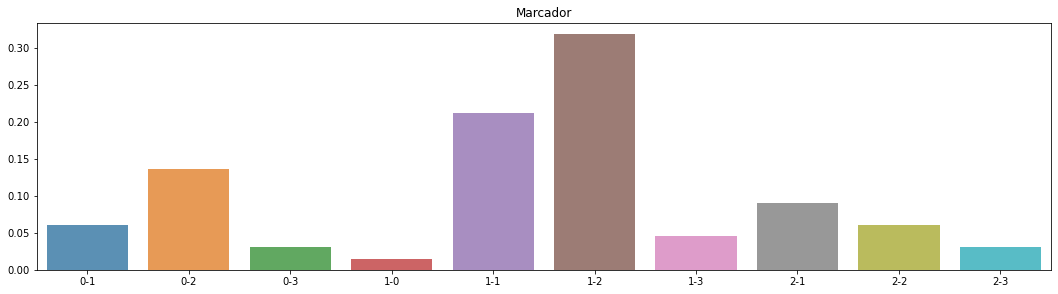

**********************
* queretaro vs atlas *
**********************


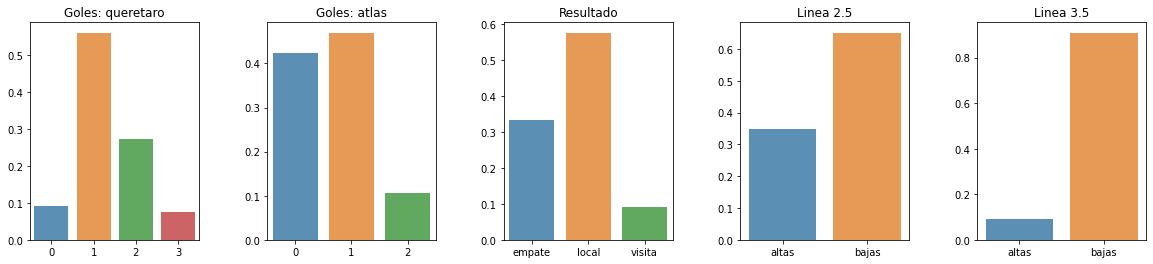

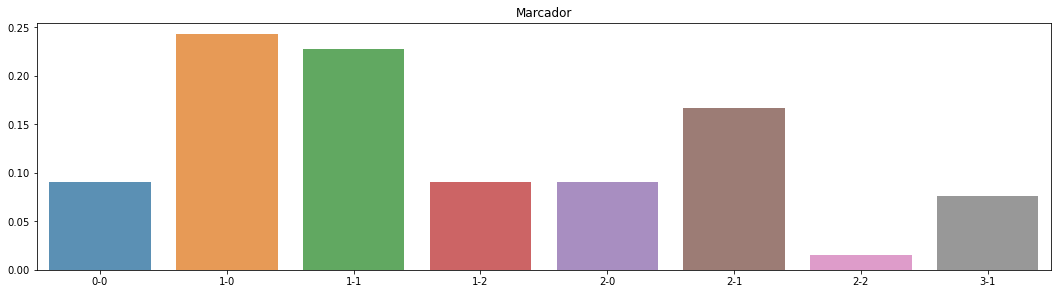

*******************
* leon vs pachuca *
*******************


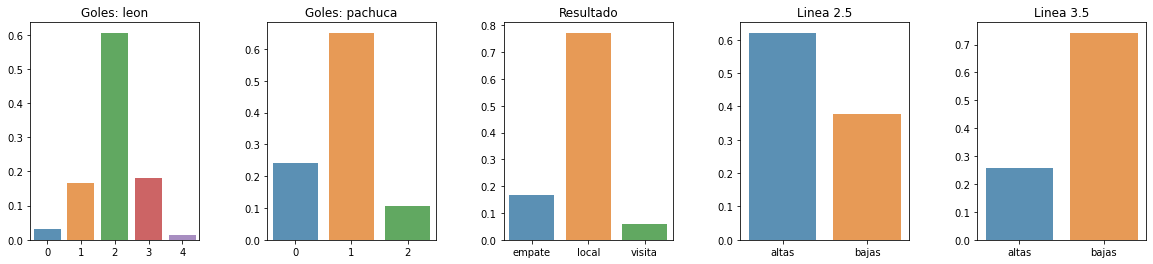

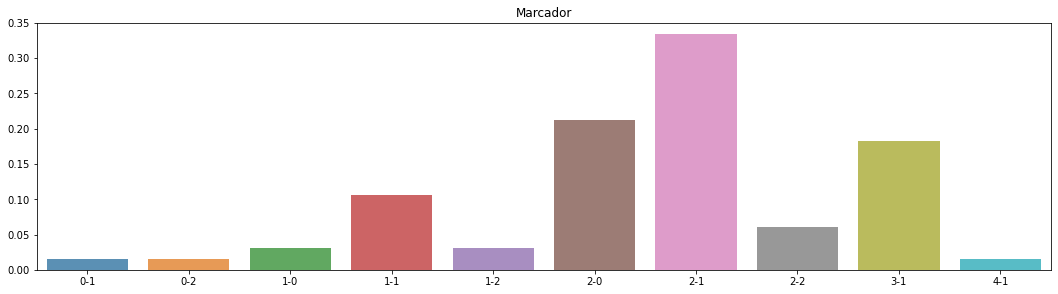

In [4]:
columns = df.columns[1:19]
for i in range(0, len(columns), 2):
    local = columns[i]
    visita = columns[i+1]
    
    titulo = 8 + len(local) + len(visita)
    print('*' * titulo)
    print(f'* {local} vs {visita} *')
    print('*' * titulo)
    
    local_df = df[[local, visita]]
    
    # Sumatoria de goles
    sumatoria = local_df[local] + local_df[visita]
    condiciones_de_sumatoria_2_5 = [
        (sumatoria > 2.5),
        (sumatoria < 2.5)
    ]
    valores_de_condiciones_de_sumatoria_2_5 = ['altas', 'bajas']
    
    condiciones_de_sumatoria_3_5 = [
        (sumatoria > 3.5),
        (sumatoria < 3.5)
    ]
    valores_de_condiciones_de_sumatoria_3_5 = ['altas', 'bajas']
    
    # Resultado del partido
    condiciones_de_resultado = [
        (local_df[local] > local_df[visita]),
        (local_df[local] < local_df[visita]),
        (local_df[local] == local_df[visita])
    ]
    valores_de_condiciones_de_resultado = ['local', 'visita', 'empate']
    
    # Creamos el tipo de resultado 
    local_df['resultado'] = np.select(condiciones_de_resultado, valores_de_condiciones_de_resultado)
    
    # Creamos el resultado
    local_df['marcador'] = local_df[local].astype(str) + '-' + local_df[visita].astype(str)
    
    # Sumatoria de resultado
    local_df['linea 2.5'] = np.select(condiciones_de_sumatoria_2_5, valores_de_condiciones_de_sumatoria_2_5)
    
    # Sumatoria de resultado
    local_df['linea 3.5'] = np.select(condiciones_de_sumatoria_3_5, valores_de_condiciones_de_sumatoria_3_5)

    fig = plt.figure(figsize=(20, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    data_local = local_df[local].value_counts(normalize=True).sort_index()  
    data_visita = local_df[visita].value_counts(normalize=True).sort_index()
    data_resultado = local_df['resultado'].value_counts(normalize=True).sort_index()
    data_marcador = local_df['marcador'].value_counts(normalize=True).sort_index()
    data_linea_2_5 = local_df['linea 2.5'].value_counts(normalize=True).sort_index()
    data_linea_3_5 = local_df['linea 3.5'].value_counts(normalize=True).sort_index()
    
    ax = fig.add_subplot(1, 5, 1)
    sns.barplot(data_local.index, data_local.values, alpha=0.8, ax=ax)
    plt.title(f'Goles: {local}')
    
    ax = fig.add_subplot(1, 5, 2)
    sns.barplot(data_visita.index, data_visita.values, alpha=0.8, ax=ax)
    plt.title(f'Goles: {visita}')
    
    ax = fig.add_subplot(1, 5, 3)
    sns.barplot(data_resultado.index, data_resultado.values, alpha=0.8, ax=ax)
    plt.title(f'Resultado')
    
    ax = fig.add_subplot(1, 5, 4)
    sns.barplot(data_linea_2_5.index, data_linea_2_5.values, alpha=0.8, ax=ax)
    plt.title(f'Linea 2.5')
    
    ax = fig.add_subplot(1, 5, 5)
    sns.barplot(data_linea_3_5.index, data_linea_3_5.values, alpha=0.8, ax=ax)
    plt.title(f'Linea 3.5')
    
    fig = plt.figure(figsize=(40, 10))
    ax = fig.add_subplot(2, 2, 1)
    sns.barplot(data_marcador.index, data_marcador.values, alpha=0.8, ax=ax)
    plt.title(f'Marcador')

    plt.show()

# Columnas nuevas

In [4]:
# Creamos columnas con resultados concatenados
for i in range(1, len(df.columns[:19]), 2):
    equipo_local = df.columns[i]
    equipo_visitante = df.columns[i+1]
    
    # Placeholder del partido
    nombre_de_partido = equipo_local + '-' + equipo_visitante
    
    # Sumatoria de goles
    sumatoria = df[equipo_local] + df[equipo_visitante]
    condiciones_de_sumatoria = [
        (sumatoria > 2.5),
        (sumatoria < 2.5)
    ]
    valores_de_condiciones_de_sumatoria = ['altas', 'bajas']
    
    # Resultado del partido
    condiciones_de_resultado = [
        (df[equipo_local] > df[equipo_visitante]),
        (df[equipo_local] < df[equipo_visitante]),
        (df[equipo_local] == df[equipo_visitante])
    ]
    valores_de_condiciones_de_resultado = ['local', 'visita', 'empate']
    
    # Creamos el tipo de resultado 
    df[nombre_de_partido + '_resultado'] = np.select(condiciones_de_resultado, valores_de_condiciones_de_resultado)
    
    # Creamos el resultado
    df[nombre_de_partido + '_exacto'] = df[equipo_local].astype(str) + '-' + df[equipo_visitante].astype(str)
    
    # Sumatoria de resultado
    df[nombre_de_partido + '_altas-bajas'] = np.select(condiciones_de_sumatoria, valores_de_condiciones_de_sumatoria)

# Resultados

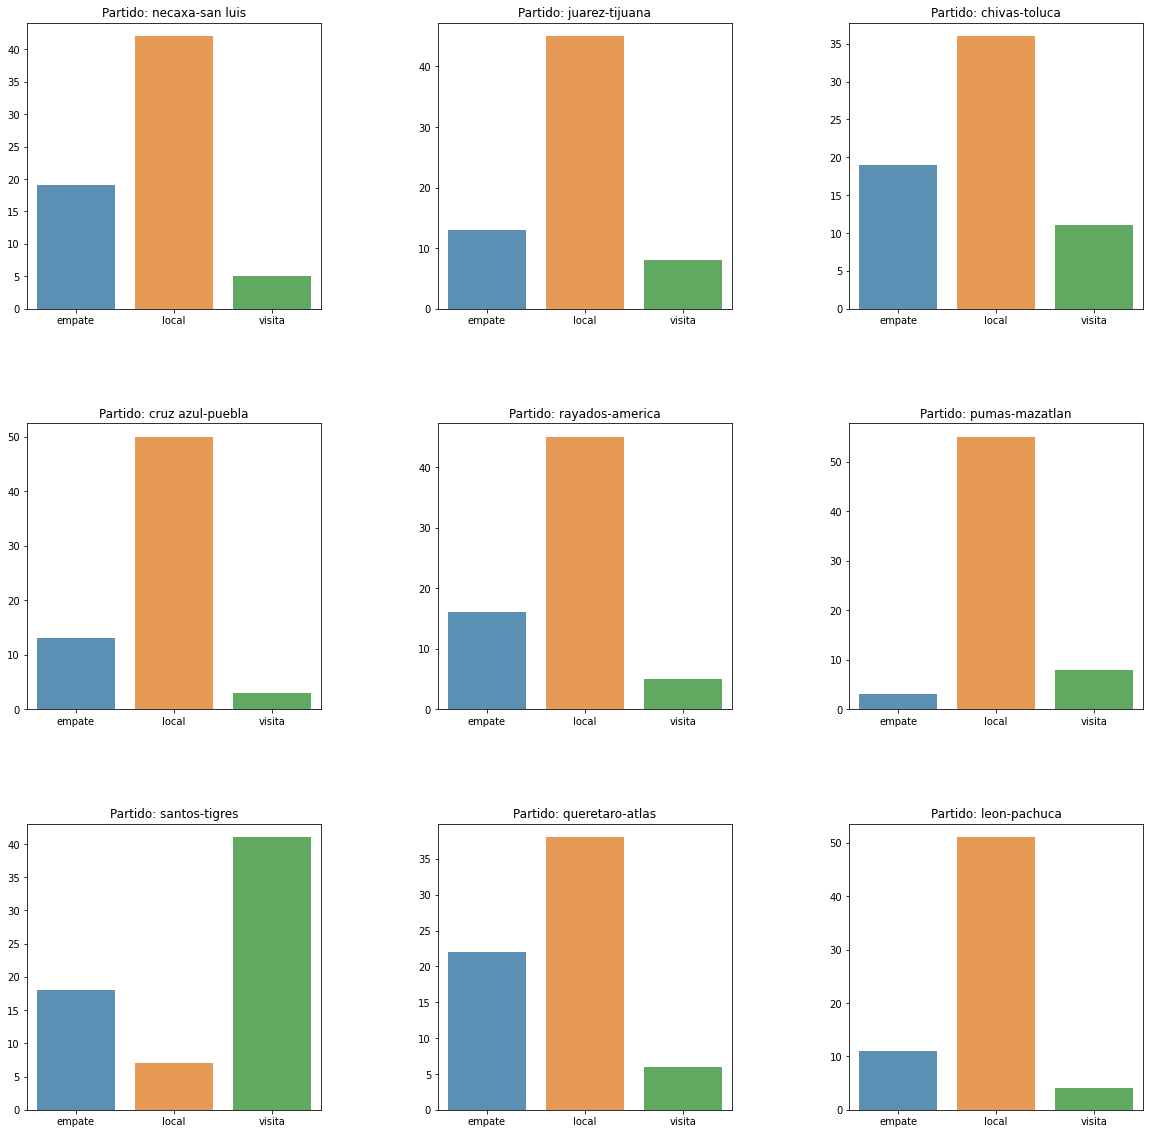

In [5]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
grafica = '_resultado'

for (i, column) in enumerate(filter(lambda x: x.find(grafica) > 0, df.columns), start=1):
    partido = df[column].value_counts().sort_index()
    
    ax = fig.add_subplot(3, 3, i)
    sns.barplot(partido.index, partido.values, alpha=0.8, ax=ax)
    plt.title(f'Partido: {column[:column.find(grafica)]}')

plt.show()

# Altas y bajas

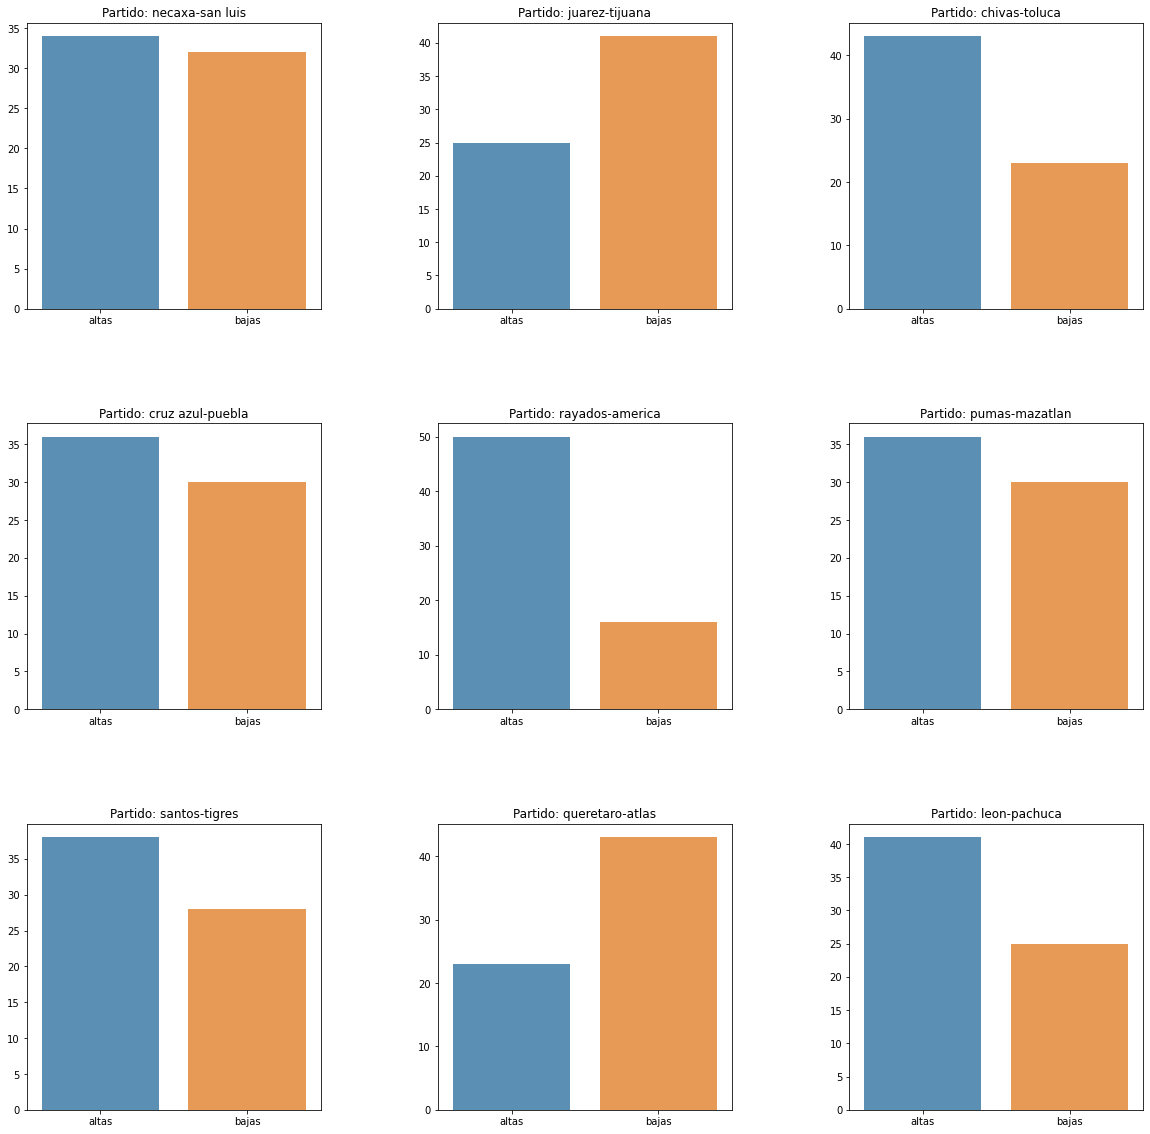

In [6]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
grafica = '_altas-bajas'

for (i, column) in enumerate(filter(lambda x: x.find(grafica) > 0, df.columns), start=1):
    partido = df[column].value_counts().sort_index()
    
    ax = fig.add_subplot(3, 3, i)
    sns.barplot(partido.index, partido.values, alpha=0.8, ax=ax)
    plt.title(f'Partido: {column[:column.find(grafica)]}')

plt.show()